<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da10_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 합치기

* merge : 두 개 이상의 데이터프레임을 공통된 컬럼(들)을 기준으로 합치는 것. SQL의 join과 비슷한 기능.
* concat : 두 개 이상의 데이터프레임을 축(axis)을 따라서 합치는 것.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

In [4]:
emp = pd.DataFrame(data={
    'empno': [100, 101, 200, 201],
    'ename': ['Scott', 'Tiger', 'King', '오쌤'],
    'deptno': [10, 20, 10, 50]
})
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,201,오쌤,50


In [5]:
dept = pd.DataFrame(data={
    'deptno': [10, 20, 30],
    'dname': ['HR', 'IT', 'Sales'],
})
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales


* `pd.merge(left, right, how, on, ...)` 함수
* `pd.DataFrame.merge(right, how, on, ...)` 메서드
* 파라미터 how : merge 방식(inner, left, right, outer). 기본값은 'inner'.
* 파라미터 on : join의 기준이 되는 컬럼(들의 리스트). join 컬럼 이름이 같은 경우에는 생략 가능.

## inner join

In [6]:
pd.merge(emp, dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


In [7]:
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR


## left (outer) join

In [8]:
pd.merge(emp, dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,201,오쌤,50,NaN


In [9]:
emp.merge(dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,Tiger,20,IT
2,200,King,10,HR
3,201,오쌤,50,NaN


## right (outer) join

In [10]:
pd.merge(emp, dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


In [11]:
emp.merge(dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales


## full (outer) join

In [12]:
emp.merge(dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,King,10,HR
2,101.0,Tiger,20,IT
3,NaN,NaN,30,Sales
4,201.0,오쌤,50,NaN


## join 기준 컬럼 이름이 다른 경우

In [13]:
emp

,empno,ename,deptno
0,100,Scott,10
1,101,Tiger,20
2,200,King,10
3,201,오쌤,50


In [14]:
dept2 = pd.DataFrame(data={
    'dno':[10, 20, 30],
    'dname':['인사', '아이티', '영업']
})
dept2

,dno,dname
0,10,인사
1,20,아이티
2,30,영업


In [15]:
# inner join
pd.merge(emp, dept2, left_on='deptno', right_on = 'dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,인사
1,101,Tiger,20,20,아이티
2,200,King,10,10,인사


In [16]:
# left (outer) join
pd.merge(emp, dept2, how='left', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10.0,인사
1,101,Tiger,20,20.0,아이티
2,200,King,10,10.0,인사
3,201,오쌤,50,NaN,NaN


In [17]:
# right (outer) join
pd.merge(emp, dept2, how='right', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10,인사
1,200.0,King,10.0,10,인사
2,101.0,Tiger,20.0,20,아이티
3,NaN,NaN,NaN,30,영업


In [18]:
# full (outer) join
pd.merge(emp, dept2, how='outer', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100.0,Scott,10.0,10.0,인사
1,200.0,King,10.0,10.0,인사
2,101.0,Tiger,20.0,20.0,아이티
3,NaN,NaN,NaN,30.0,영업
4,201.0,오쌤,50.0,NaN,NaN


## 인덱스 (row label)로 merge

In [19]:
np.random.seed(1)

In [20]:
df1 = pd.DataFrame(data={'value1': np.random.randint(100, size=6),
                         'value2': ['a', 'b', 'c'] * 2})
df1

,value1,value2
0,37,a
1,12,b
2,72,c
3,9,a
4,75,b
5,5,c


In [21]:
df2 = pd.DataFrame(data={'value3': np.arange(10, 40, 10)},
                   index=['a','b','c'])
df2

,value3
a,10
b,20
c,30


In [22]:
pd.merge(df1, df2, left_on='value2', right_on=df2.index)

,value1,value2,value3
0,37,a,10
1,12,b,20
2,72,c,30
3,9,a,10
4,75,b,20
5,5,c,30


In [23]:
# df1과 df를 merge
pd.merge(df1, df2, left_on='value2', right_index=True)

,value1,value2,value3
0,37,a,10
1,12,b,20
2,72,c,30
3,9,a,10
4,75,b,20
5,5,c,30


# concat

## Series에서의 concat

In [24]:
s1 = pd.Series(data=['scott', 'allen', 'king'])
s1

,0
0,scott
1,allen
2,king


In [25]:
s2 = pd.Series(data=['오쌤', '홍길동'])
s2

,0
0,오쌤
1,홍길동


In [26]:
pd.concat([s1, s2], axis=0)     # axis=0 : 컬럼 방향, axis=1 : index 방향

,0
0,scott
1,allen
2,king
0,오쌤
1,홍길동


In [27]:
pd.concat([s1, s2], ignore_index=True)  # index 재정립

,0
0,scott
1,allen
2,king
3,오쌤
4,홍길동


In [28]:
s3 = pd.Series(data=['HR', 'IT'])
s3

,0
0,HR
1,IT


In [29]:
pd.concat([s1, s3], axis=1)

,0,1
0,scott,HR
1,allen,IT
2,king,NaN


## DataFrame 에서의 concat

In [30]:
np.random.seed(1)
day1_df = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                       columns=['A', 'B', 'C'])
day1_df

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50


In [31]:
day2_df = pd.DataFrame(data=np.random.randint(100, size=(5, 3)),
                       columns=['A', 'B', 'C'])
day2_df

,A,B,C
0,20,18,84
1,11,28,29
2,14,50,68
3,87,87,94
4,96,86,13


In [32]:
pd.concat([day1_df, day2_df], ignore_index=True)    # axis=0 이 기본값이여서 생략.

,A,B,C
0,37,12,72
1,9,75,5
2,79,64,16
3,1,76,71
4,6,25,50
5,20,18,84
6,11,28,29
7,14,50,68
8,87,87,94
9,96,86,13


In [33]:
df = pd.DataFrame(data=np.random.rand(5,3),
                  columns=['d', 'e', 'f'])
df

,d,e,f
0,0.715971,0.802758,0.092801
1,0.518153,0.865020,0.829147
2,0.829603,0.273050,0.059243
3,0.670528,0.593066,0.671654
4,0.411788,0.197551,0.289630


In [34]:
pd.concat([day1_df, df], axis=1)

,A,B,C,d,e,f
0,37,12,72,0.715971,0.802758,0.092801
1,9,75,5,0.518153,0.865020,0.829147
2,79,64,16,0.829603,0.273050,0.059243
3,1,76,71,0.670528,0.593066,0.671654
4,6,25,50,0.411788,0.197551,0.289630


# merge, concat 연습 1

* https://github.com/pandas-dev/pandas/tree/main/doc/data 데이터 사용
* air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고, 각각 데이터프레임을 생성.
* air_quality_no2와 air_quality_pm25 데이터프레임을 병합
* 위에서 만들어진 데이터프레임과 air_quality_stations 데이터프레임 병합.

In [35]:
no2 = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_no2_long.csv'
no2_df = pd.read_csv(no2)

In [36]:
pm25 = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_pm25_long.csv'
pm25_df = pd.read_csv(pm25)

In [37]:
stations = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_stations.csv'
stat_df = pd.read_csv(stations)

## air_quality_no2 데이터프레임

In [38]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [39]:
no2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [40]:
no2_df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [41]:
no2_df.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [42]:
no2_df.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [43]:
no2_df.parameter.unique()   # 이산화질소

array(['no2'], dtype=object)

In [44]:
no2_df.value.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


## air_quality_pm25 데이터프레임

In [45]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [46]:
pm25_df.tail()

,city,country,date.utc,location,parameter,value,unit
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [47]:
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [48]:
pm25_df.city.unique()

array(['Antwerpen', 'London'], dtype=object)

In [49]:
pm25_df.country.unique()

array(['BE', 'GB'], dtype=object)

In [50]:
pm25_df.location.unique()

array(['BETR801', 'London Westminster'], dtype=object)

## air_quality_stations 데이터프레임

In [51]:
stat_df.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [52]:
stat_df.tail()

,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [53]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [54]:
stat_df[(stat_df.location == 'FR04014') |
        (stat_df.location == 'BETR801') |
        (stat_df.location == 'London Westminster')]

stat_df[stat_df.location.isin(['FR04014', 'BETR801', 'London Westminster'])]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
60,London Westminster,51.49467,-0.13193


In [55]:
station = stat_df.drop(labels=27)  # 중복되는 27번째 행 삭제.
station.iloc[25:30]
# stat_df.iloc[25:30]

,location,coordinates.latitude,coordinates.longitude
25,FR04012,48.82778,2.32750
26,FR04014,48.83724,2.39390
28,FR04031,48.86887,2.31194
29,FR04031,48.86889,2.31194
30,FR04037,48.82861,2.36028


In [56]:
station[station.location.isin(['FR04014', 'BETR801', 'London Westminster'])]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
26,FR04014,48.83724,2.39390
60,London Westminster,51.49467,-0.13193


## no2_df 와 pm25_df 병합

In [57]:
new_df = pd.concat([no2_df, pm25_df], ignore_index=True)
new_df.shape

(3178, 7)

In [58]:
new_df.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3178 non-null   object 
 1   country    3178 non-null   object 
 2   date.utc   3178 non-null   object 
 3   location   3178 non-null   object 
 4   parameter  3178 non-null   object 
 5   value      3178 non-null   float64
 6   unit       3178 non-null   object 
dtypes: float64(1), object(6)
memory usage: 173.9+ KB


In [60]:
new_df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [61]:
new_df.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [62]:
new_df.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

## 마지막 데이터 병합 new_df + station 데이터프레임 merge

In [63]:
# 마지막 데이터 병합
air_quality = pd.merge(new_df, station)

In [64]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939


In [65]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   3178 non-null   object 
 1   country                3178 non-null   object 
 2   date.utc               3178 non-null   object 
 3   location               3178 non-null   object 
 4   parameter              3178 non-null   object 
 5   value                  3178 non-null   float64
 6   unit                   3178 non-null   object 
 7   coordinates.latitude   3178 non-null   float64
 8   coordinates.longitude  3178 non-null   float64
dtypes: float64(3), object(6)
memory usage: 223.6+ KB


In [66]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'], utc=True)

In [67]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   city                   3178 non-null   object             
 1   country                3178 non-null   object             
 2   date.utc               3178 non-null   datetime64[ns, UTC]
 3   location               3178 non-null   object             
 4   parameter              3178 non-null   object             
 5   value                  3178 non-null   float64            
 6   unit                   3178 non-null   object             
 7   coordinates.latitude   3178 non-null   float64            
 8   coordinates.longitude  3178 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 223.6+ KB


In [68]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


## London의 NO2, PM25 농도 시계열 그래프

In [69]:
london_df = air_quality[air_quality.city == 'London']

In [70]:
london_df.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1101,London,GB,2019-06-17 09:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1102,London,GB,2019-06-17 08:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
1103,London,GB,2019-06-17 07:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193


In [71]:
london_df.tail()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


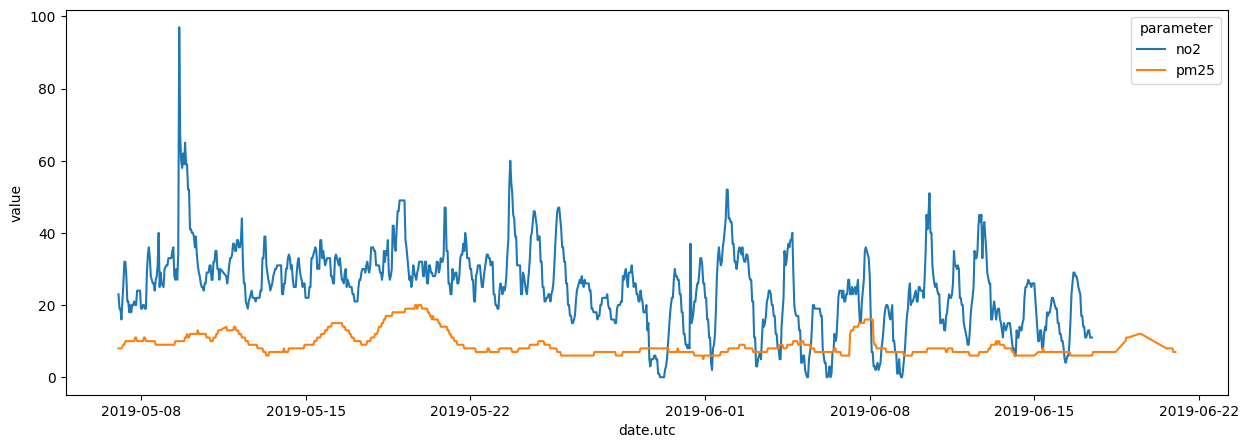

In [72]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=london_df, x='date.utc', y='value', hue='parameter')
plt.show()

# merge, concat 연습 2

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames 데이터 파일들을 사용
* 1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자 수가 정리된 파일
* 파일을 하나씩 읽어서 데이터 프레임을 생성
* 생성된 데이터프레임에 year 컬럼을 추가
* 생성된 131개의 데이터프레임을 하나로 합치기
* 연도별 신생아 수를 찾고 그래프를 그리기
* 연도별 성별 신생아 수를 찾고 그래프 그리기

## 파일을 하나씩 읽어 데이터 프레임 생성

In [73]:
yob_1880 = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob1880.txt'
yob_1881 = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob1881.txt'
yob_1882 = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob1882.txt'
yob_2010 = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob2010.txt'

In [74]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob2010.txt'
yob_2010 = pd.read_csv(file_path, names=['name', 'gender', 'births'])
yob_2010.head()

,name,gender,births
0,Isabella,F,22731
1,Sophia,F,20477
2,Emma,F,17179
3,Olivia,F,16860
4,Ava,F,15300


## 생성된 데이터프레임에 year 컬럼 추가

In [75]:
yob_dfs = {}
for i in range(1880, 2011):             # 131개 for문 사용
    yob_dfs[i] = pd.read_csv(
        f'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob{i}.txt',
        names=['name', 'sex', 'number', 'year']
    )
    yob_dfs.get(i)['year'] = int(i)     # year에 년도 추가

In [85]:
col_names = ['name', 'gender', 'births']    # 데이터프레임 컬럼 이름

yobs = []   # 각 연도의 데이터프레임을 저장할 빈 리스트 생성
for year in range(1880, 2011):
    # txt 파일이 저장된 github 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'
    # 파일을 읽어 DataFrame 생성
    yob_year = pd.read_csv(file_path, names=['name', 'gender', 'births'])
    # 데이터프레임에 year 파생변수 추가
    yob_year['year'] = year
    # 생성된 데이터프레임을 리스트에 추가
    yobs.append(yob_year)

In [87]:
len(yobs)   # 리스트의 원소 개수 - 데이터프레임 개수

131

In [96]:
yobs[0] # 리스트의 첫번째 원소 -> 1880년 데이터프레임

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [98]:
yobs[-1]    # 리스트의 마지막 원소 -> 2010년 데이터프레임

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


## 생성된 131개 데이터프레임 하나로 합치기

In [99]:
# 131개 데이터프레임 하나로 합치기
merge_131 = pd.concat(yob_dfs.values(), ignore_index=True)

merge_131.year.unique()
merge_131.tail()

,name,sex,number,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [101]:
yob_df = pd.concat(yobs, ignore_index=True)

In [103]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [104]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [105]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수를 찾고 그래프 그리기

In [77]:
y_baby = merge_131.groupby('year').number.count()
y_baby

,number
year,
1880,2000
1881,1935
1882,2127
1883,2084
1884,2297
...,...
2006,34039
2007,34883
2008,35006


In [78]:
y_baby_df = pd.DataFrame(y_baby.sort_index())   # Seires -> DataFrame

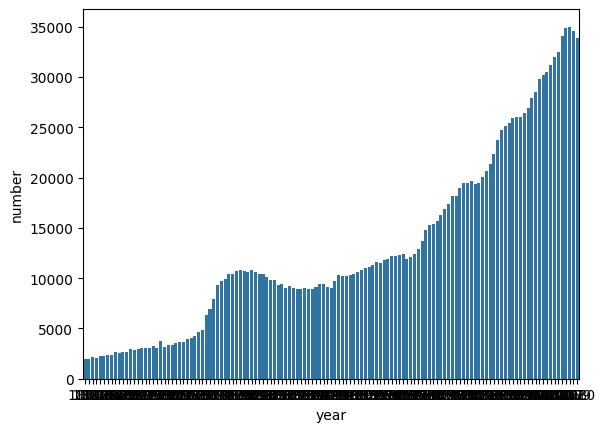

In [79]:
sns.barplot(data=y_baby_df, x='year', y='number', errorbar=None)
plt.show()

In [108]:
yob_by_year = yob_df.groupby(by=['year']).births.sum()

In [112]:
yob_by_year.head()

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466


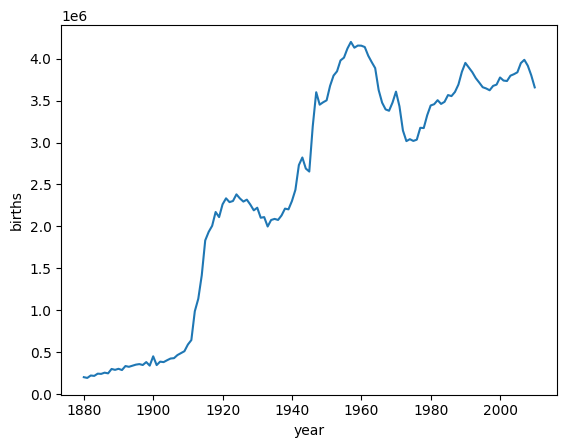

In [113]:
sns.lineplot(data=yob_by_year)
plt.show()

## 연도별 성별 신생아 수를 찾고 그래프 그리기

In [80]:
ys_baby = merge_131.groupby(['year', 'sex']).number.count()

In [81]:
ys_baby
type(ys_baby)

# series to dataframe
ys_baby_df = ys_baby.sort_index()
ys_baby_df = pd.DataFrame(ys_baby.sort_index())
type(ys_baby_df)

pandas.core.frame.DataFrame

In [82]:
ys_baby_df.head()

number
year sex        
1880 F       942
     M      1058
1881 F       938
     M       997
1882 F      1028

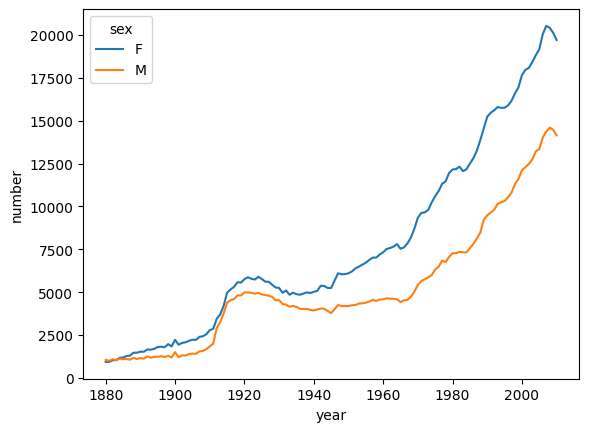

In [83]:
sns.lineplot(ys_baby_df, x='year', y='number', hue='sex')
plt.show()

In [114]:
yob_by_year_gender = yob_df.groupby(by=['year', 'gender']).births.sum()

In [122]:
yob_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [127]:
df_by_year_gender = yob_by_year_gender.reset_index()        # 인덱스를 컬럼으로 만듦.

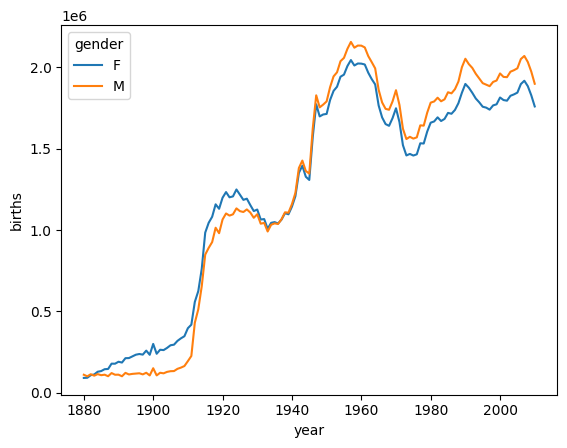

In [130]:
sns.lineplot(data = df_by_year_gender, x='year', y='births', hue='gender')
plt.show()